Option 1: CNN+NLP

Complexity: Intermediate

Task: Use any online magazine to draw bounding boxes around paragraph and use any OCR tool to extract the text

User Story: As a user I should specify the path to Pdf and the program should automatically identify texts/paragraphs and draw bounding boxes around it. In the second step program should extract the texts.

installing a poppler-utils package it is linux based package basically a pdf rendering software. 

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (105 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


installing a package pdf2image the pdf2image is a wrapper round this proper utils so basically popular has a lot of command line utilities that you can run amd take it this pdf to image just a wrapper around it.

using easyocr to extract the data from pdf basically it's an optical character recognition.

In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 57 kB/s 
     |████████████████████████████████| 47.8 MB 1.5 MB/s 


Importing all libraries

In [8]:
from pdf2image import convert_from_path
import PIL
from PIL import ImageDraw
import spacy
import numpy as np
import cv2
import easyocr

In [9]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [11]:
!wget http://www.africau.edu/images/default/sample.pdf

--2022-03-23 07:49:12--  http://www.africau.edu/images/default/sample.pdf
Resolving www.africau.edu (www.africau.edu)... 104.21.63.175, 172.67.148.215, 2606:4700:3030::ac43:94d7, ...
Connecting to www.africau.edu (www.africau.edu)|104.21.63.175|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3028 (3.0K) [application/pdf]
Saving to: ‘sample.pdf’

sample.pdf          100%[===================>]   2.96K  --.-KB/s    in 0s      

2022-03-23 07:49:12 (340 MB/s) - ‘sample.pdf’ saved [3028/3028]



it convert list of image form pdf 

In [12]:
image = convert_from_path('sample.pdf')

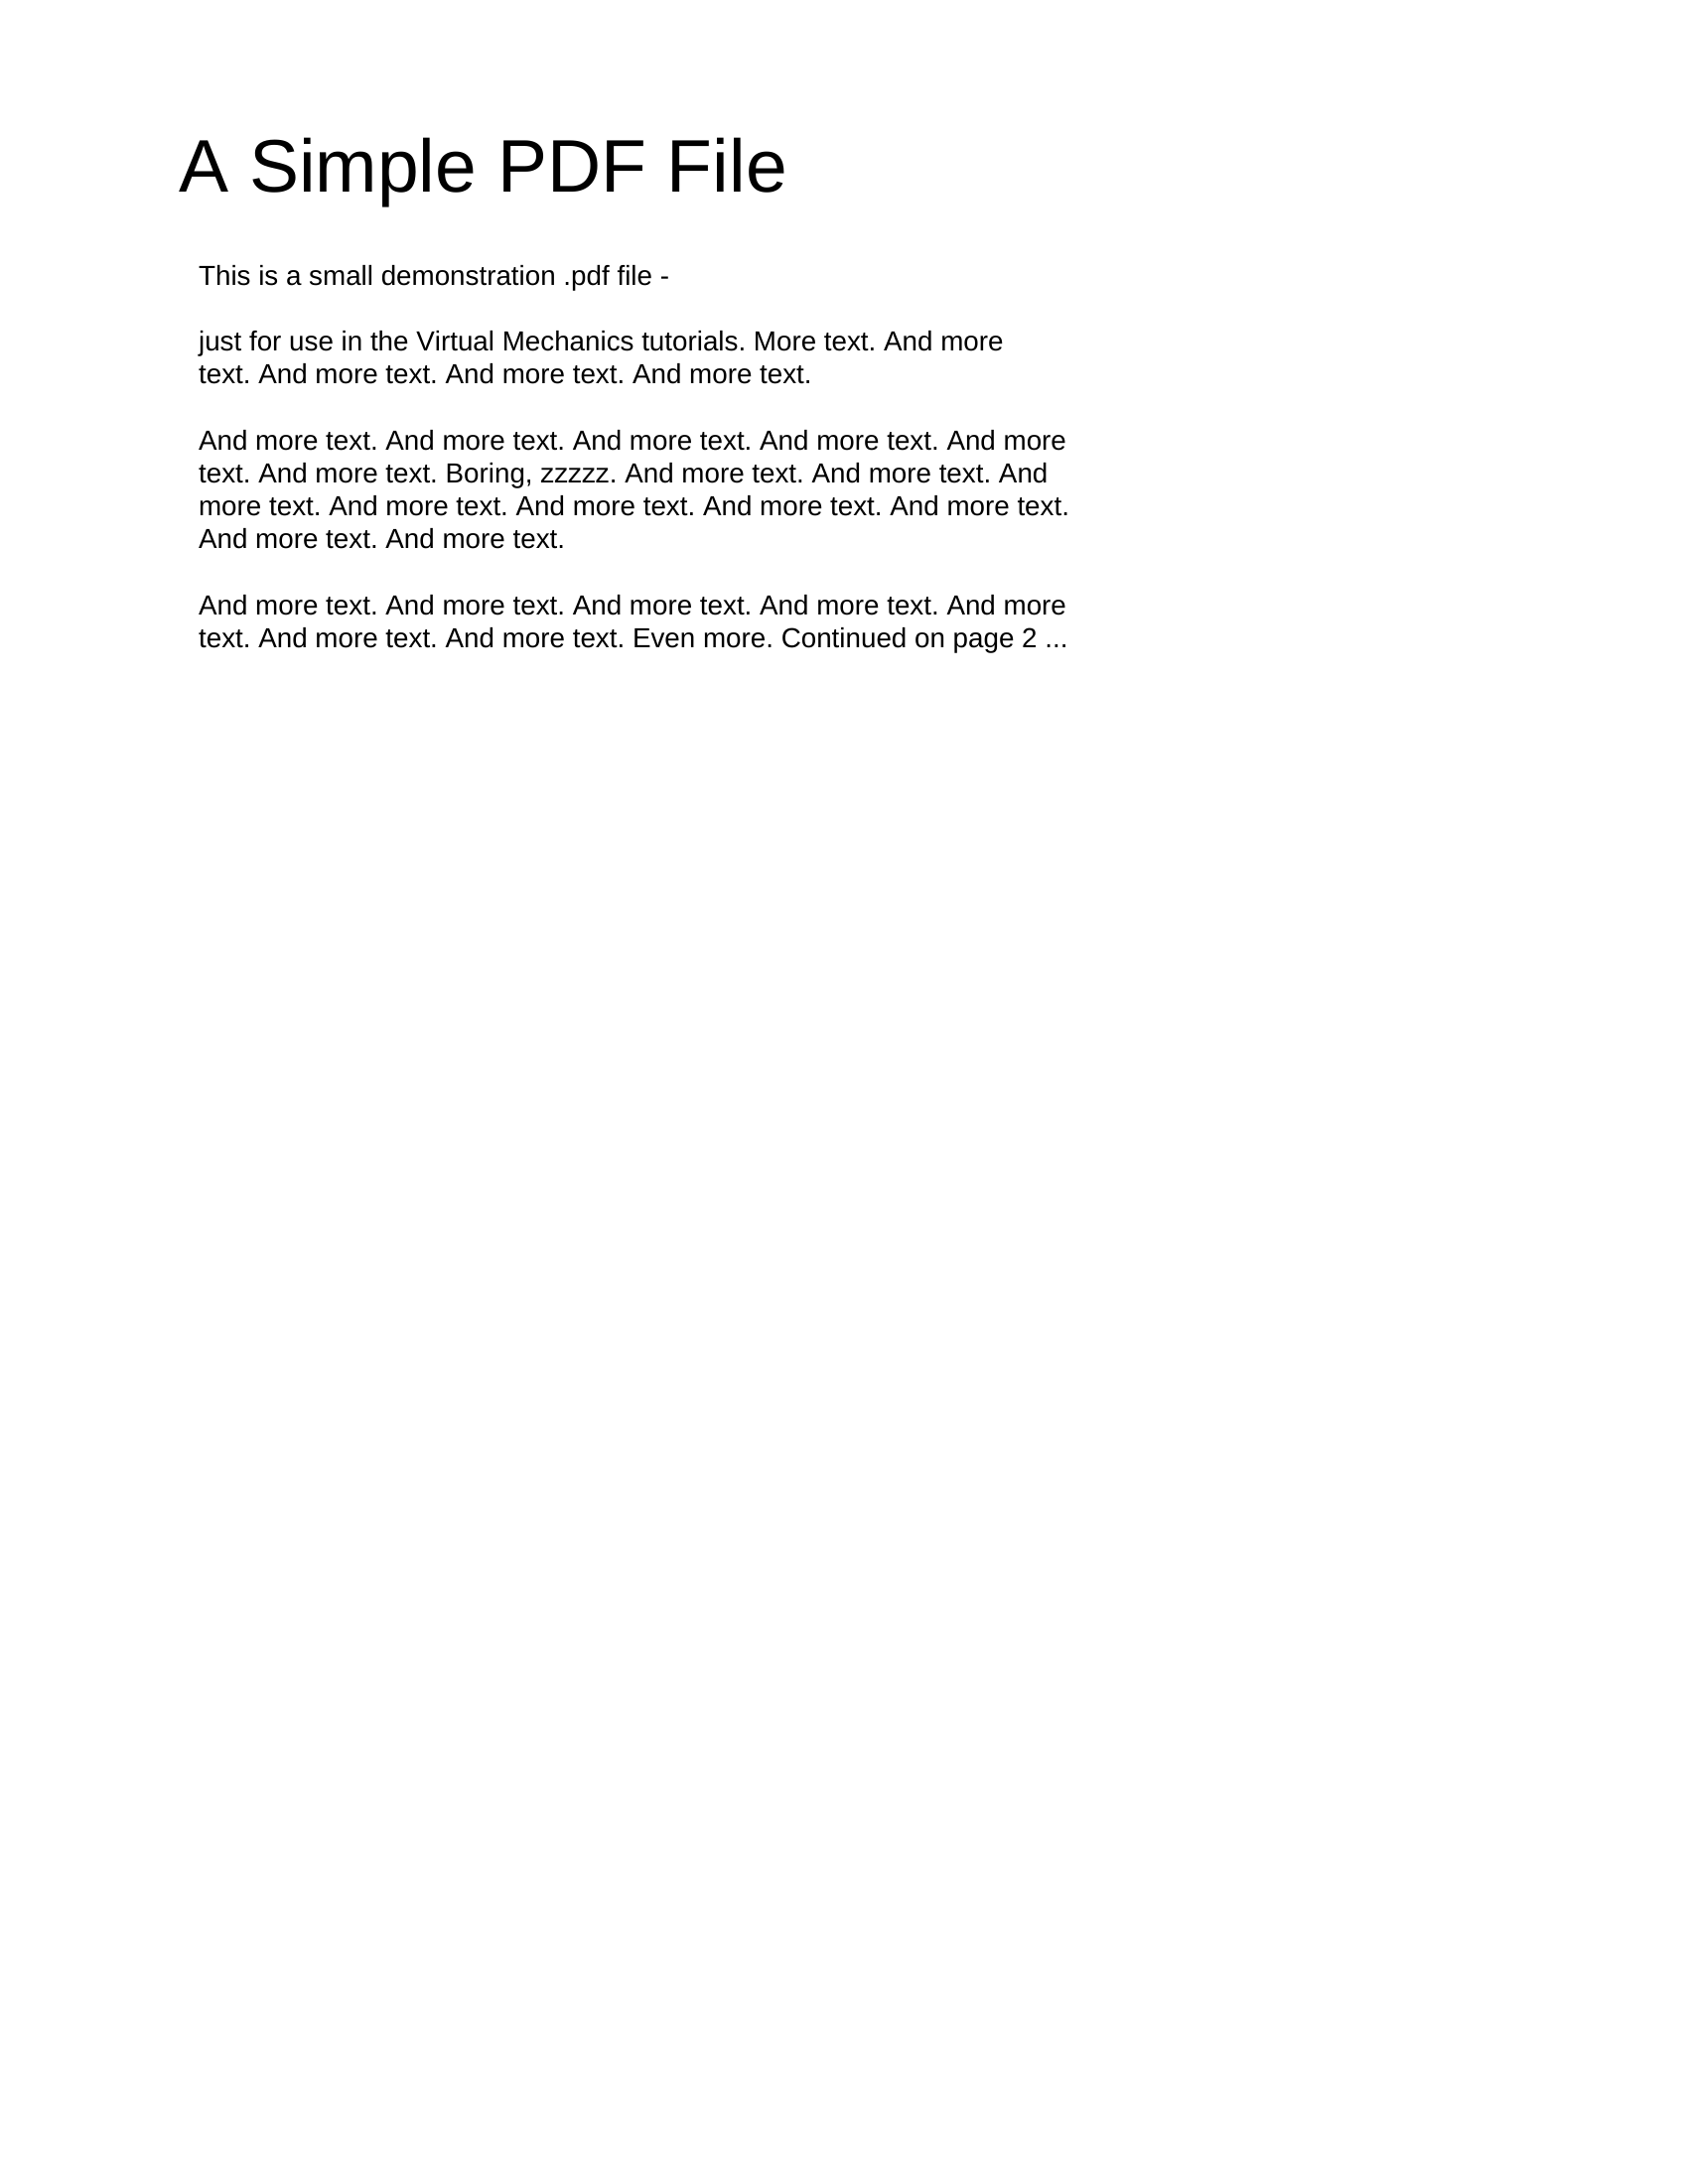

In [15]:
from IPython.display import display,Image
display(image[0])

Drawing boundbox 

In [25]:
boundbox = reader.readtext(np.array(image[0]))

In [26]:
boundbox

[([[244, 128], [801, 128], [801, 219], [244, 219]],
  'Simple PDF File',
  0.8821740085104836),
 ([[198, 262], [564, 262], [564, 294], [198, 294]],
  'This is a small demonstration',
  0.805301713405975),
 ([[613, 259], [664, 259], [664, 296], [613, 296]],
  'file',
  0.9999939203262329),
 ([[193, 327], [1013, 327], [1013, 363], [193, 363]],
  'just for use in the Virtual Mechanics tutorials. More text: And more',
  0.7838231683197902),
 ([[196, 362], [820, 362], [820, 392], [196, 392]],
  'text. And more text. And more text. And more text:',
  0.45105804678000094),
 ([[200, 428], [1076, 428], [1076, 460], [200, 460]],
  'And more text. And more text. And more text. And more text. And more',
  0.5776220771853398),
 ([[196, 462], [442, 462], [442, 492], [196, 492]],
  'text. And more text.',
  0.6249073180076825),
 ([[445, 457], [1061, 457], [1061, 498], [445, 498]],
  'Boring, zzzzz. And more text: And more text: And',
  0.5985870582845453),
 ([[200, 494], [1076, 494], [1076, 526], [20

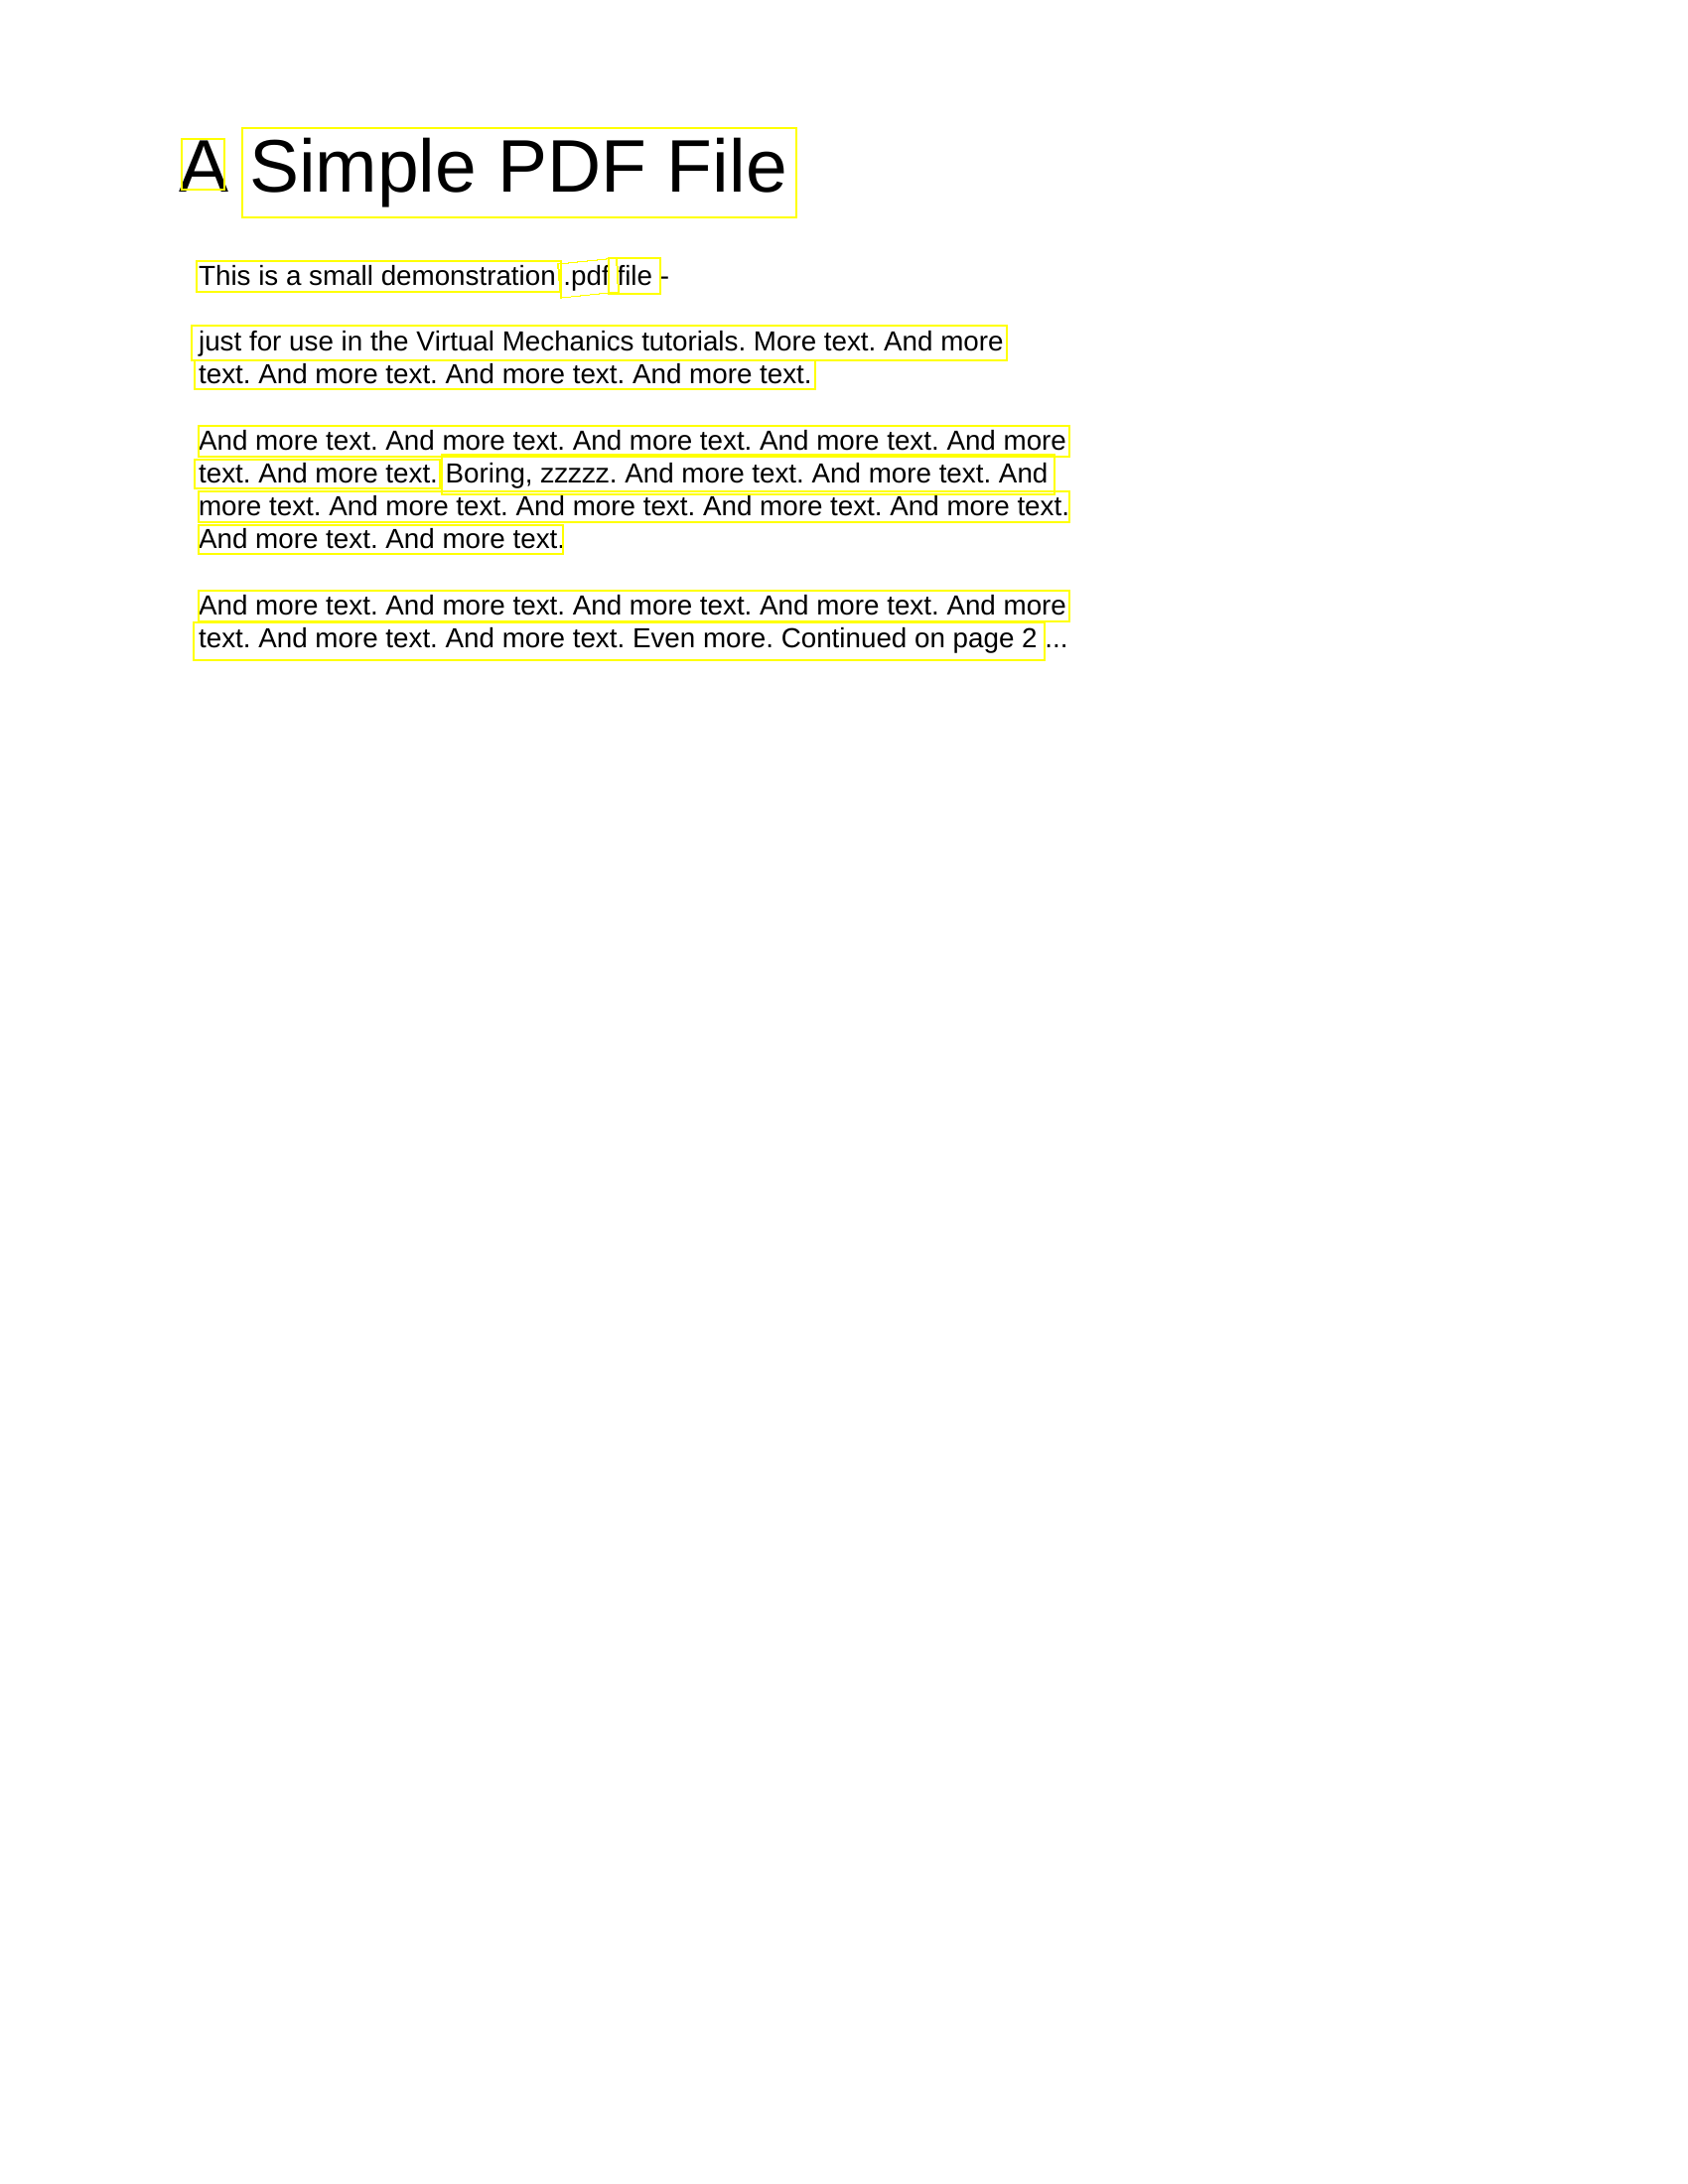

In [27]:
def drawbox(image,boundbox,color='yellow',width=2):
  draw = ImageDraw.Draw(image)
  for bound in boundbox:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color,width=width)
  return image

drawbox(image[0],boundbox)

In [29]:
boundbox[0][1]

'Simple PDF File'

Extracting Text!

In [31]:
text = ''
for i in range(len(boundbox)):
  text = text + boundbox[i][1] + '\n'

print(text)

Simple PDF File
This is a small demonstration
file
just for use in the Virtual Mechanics tutorials. More text: And more
text. And more text. And more text. And more text:
And more text. And more text. And more text. And more text. And more
text. And more text.
Boring, zzzzz. And more text: And more text: And
more text. And more text. And more text. And more text: And more text.
And more text. And more text_
And more text. And more text. And more text. And more text. And more
text: And more text: And more text. Even more. Continued on page 2
~pdf

